# ESTUDIO ESTADÍSTICO DE LA NBA (TEMPORADA 2018 - 2019)

In [1]:
import pandas as pd
import sqlite3 as sqlite
#import chartify as graphics

## CREAR CONEXIÓN A LA BASE DE DATOS (nba_data.db)

In [2]:
sql_data = 'nba_data.db'
connection = sqlite.connect(sql_data)


## OBTENCIÓN DE DATOS

### 1. Descripción de los equipos que jugaron en esta temporada, junto con la conferencia a la que pertenecen, el número de jugadores (rookies y no rookies) del equipo.

In [3]:
query = 'SELECT * FROM STAT_PT;'

playersTeams_df = pd.read_sql(query, connection)
playersTeams_df

,Id,Team,Conference,Players,Players_Perc,NoRookies,NoRookies_Perc,Rookies,Rookies_Perc
0,1,Milwaukee Bucks,E,24,3.86,21,3.38,3,0.48
1,2,Golden State Warriors,W,17,2.73,15,2.41,2,0.32
2,3,Toronto Raptors,E,22,3.54,21,3.38,1,0.16
3,4,Utah Jazz,W,18,2.89,17,2.73,1,0.16
4,5,Houston Rockets,W,23,3.70,19,3.05,4,0.64
5,6,Portland Trail Blazers,W,18,2.89,16,2.57,2,0.32
6,7,Denver Nuggets,W,18,2.89,14,2.25,4,0.64
7,8,Boston Celtics,E,17,2.73,15,2.41,2,0.32
8,9,Oklahoma City Thunder,W,18,2.89,14,2.25,4,0.64
9,10,Indiana Pacers,E,17,2.73,15,2.41,2,0.32


### 2. Número de jugadores (rookies y no rookies) porcentaje por cada conferencias

In [4]:
query = 'SELECT Conference, SUM(Players) AS Players, SUM(Players_Perc) AS "Players %", SUM(NoRookies) AS "No Rookies", SUM(NoRookies_Perc) AS "No Rookies %", SUM(Rookies) AS Rookies, SUM(Rookies_Perc) AS "Rookies %" FROM STAT_PT GROUP BY Conference;'
playersConf_df = pd.read_sql(query, connection)
playersConf_df

,Conference,Players,Players %,No Rookies,No Rookies %,Rookies,Rookies %
0,E,316,50.8,263,42.28,53,8.49
1,W,306,49.2,248,39.84,58,9.29


### 3. Simulación de la clasificación final de la temporada (basandonos en  el porcentaje de victorias / derrotas)

In [5]:
#query = 'SELECT id, Key, Team,  W AS Wins, L AS Losses FROM TEAMS ORDER BY W/L DESC;'
query = 'SELECT * FROM TEAMS ORDER BY W/L DESC;'
teamsQualy_df = pd.read_sql(query, connection)
teamsQualy_df

,id,Key,Team,Conf,W,L,W/L%,MOV,ORtg,DRtg,NRtg
0,1,MIL,Milwaukee Bucks,E,60.0,22.0,0.732,8.87,114.23,105.76,8.47
1,3,TOR,Toronto Raptors,E,58.0,24.0,0.707,6.09,113.99,108.00,5.99
2,2,GSW,Golden State Warriors,W,57.0,25.0,0.695,6.46,116.63,110.24,6.39
3,7,DEN,Denver Nuggets,W,54.0,28.0,0.659,3.95,113.76,109.62,4.14
4,5,HOU,Houston Rockets,W,53.0,29.0,0.646,4.77,116.25,111.43,4.82
5,6,POR,Portland Trail Blazers,W,53.0,29.0,0.646,4.20,115.45,111.07,4.38
6,11,PHI,Philadelphia 76ers,E,51.0,31.0,0.622,2.70,113.21,110.58,2.64
7,4,UTA,Utah Jazz,W,50.0,32.0,0.610,5.26,111.35,106.11,5.24
8,8,BOS,Boston Celtics,E,49.0,33.0,0.598,4.44,112.78,108.35,4.43
9,9,OKC,Oklahoma City Thunder,W,49.0,33.0,0.598,3.40,110.85,107.53,3.31


### 4. Primer equipo de cada conferencia

In [6]:
#query = 'SELECT Conf AS Conference, ID, Key, Team, W AS Wins, L AS Losses FROM TEAMS GROUP BY CONF HAVING MAX(W/L);'
query = 'SELECT * FROM TEAMS GROUP BY CONF HAVING MAX(W/L);'
bestTeamConf_df = pd.read_sql(query, connection)
bestTeamConf_df

,id,Key,Team,Conf,W,L,W/L%,MOV,ORtg,DRtg,NRtg
0,1,MIL,Milwaukee Bucks,E,60.0,22.0,0.732,8.87,114.23,105.76,8.47
1,2,GSW,Golden State Warriors,W,57.0,25.0,0.695,6.46,116.63,110.24,6.39


### 5. Todos los jugadores

In [7]:
query = 'SELECT Player, FGA, FTA, PTS FROM PLAYERS;'
players_df = pd.read_sql(query, connection)
players_df

,Player,FGA,FTA,PTS
0,Álex Abrines,157.0,13.0,165.0
1,Quincy Acy,18.0,10.0,17.0
2,Jaylen Adams,110.0,9.0,108.0
3,Steven Adams,809.0,292.0,1108.0
4,Bam Adebayo,486.0,226.0,729.0
...,...,...,...,...
703,Tyler Zeller,28.0,18.0,46.0
704,Ante Žižić,331.0,132.0,459.0
705,Ivica Zubac,379.0,126.0,525.0
706,Ivica Zubac,193.0,66.0,281.0


## Correlación

In [20]:
players_df.corr()

,FGA,FTA,PTS,TA,PTS_pred
FGA,1.000000,0.883147,0.990928,0.993240,0.993240
FTA,0.883147,1.000000,0.922593,0.931628,0.931628
PTS,0.990928,0.922593,1.000000,0.995973,0.995973
TA,0.993240,0.931628,0.995973,1.000000,1.000000
PTS_pred,0.993240,0.931628,0.995973,1.000000,1.000000


## Modelo de regresión lineal

Con los datos obtenidos de nuestra base de datos almacenados en el dataframe **players_df** se buscará predecir cuanto anotará cada jugador, creando un modelo de regresión lineal basado en los intentos de tiro de la temporada almacenada en la base de datos

Creacion de la columna con todos los intentos de tiro (tiros de campo + tiros libres)

In [8]:
players_df['TA'] = players_df['FGA']+players_df['FTA']

In [9]:
import statsmodels.formula.api as smf

In [10]:
lm = smf.ols(formula='PTS~TA', data=players_df).fit()

In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 8.712e+04
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        22:32:21   Log-Likelihood:                -3631.3
No. Observations:                 708   AIC:                             7267.
Df Residuals:                     706   BIC:                             7276.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2094      2.157     -2.415      0.016      -9.444      -0.975
TA             1.0001      0.003    295.159      0.000       0.993       1.007
==============================================================================
Omnibus:                      107.277   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.854
Skew:                           0.175   Prob(JB):                    5.36e-273
Kurtosis:                       9.510   Cond. No.                         893.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
lm.params

Intercept   -5.209429
TA           1.000137
dtype: float64

In [13]:
#pts_pred = lm.predict(pd.DataFrame(players_df['TA']))
players_df['PTS_pred'] = lm.params[0] + lm.params[1] * players_df['TA']

Formula de modelo: PTS = -5.209429 + 1.000137 * TA

In [14]:
import numpy as np

In [15]:
SSD = sum((players_df["PTS"]-players_df['PTS_pred'])**2)
RSE = np.sqrt(SSD/len(players_df)-1)
RSE/np.mean(players_df['PTS'])

0.09255001071121378

In [16]:
import matplotlib.pyplot as plt

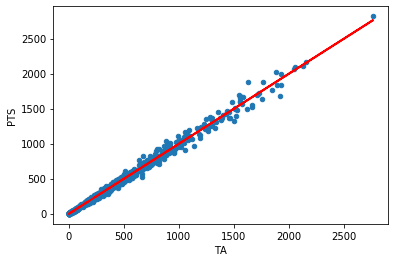

In [17]:
%matplotlib inline
players_df.plot(kind = "scatter", x = "TA", y ="PTS")
plt.plot(pd.DataFrame(players_df["TA"]), players_df['PTS_pred'], c="red", linewidth = 2)

In [18]:
players_df

,Player,FGA,FTA,PTS,TA,PTS_pred
0,Álex Abrines,157.0,13.0,165.0,170.0,164.813847
1,Quincy Acy,18.0,10.0,17.0,28.0,22.794404
2,Jaylen Adams,110.0,9.0,108.0,119.0,113.806864
3,Steven Adams,809.0,292.0,1108.0,1101.0,1095.941316
4,Bam Adebayo,486.0,226.0,729.0,712.0,706.888055
...,...,...,...,...,...,...
703,Tyler Zeller,28.0,18.0,46.0,46.0,40.796869
704,Ante Žižić,331.0,132.0,459.0,463.0,457.853963
705,Ivica Zubac,379.0,126.0,525.0,505.0,499.859714
706,Ivica Zubac,193.0,66.0,281.0,259.0,253.826032
